In [1]:
import numpy as np
import pocomc as pc
import os
from getdist import plots, MCSamples
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#names = ["Bias parameter", "Growth rate"]
names = ["b", "f"]
labels = ["b", "f"]

ref_chain = np.load("../output/BOSS_DR12_NGC_z1/samples/n2048/cov_sample/cov_sample_2048_results_v1.npy", allow_pickle=True)
reference = MCSamples(samples=ref_chain[()]["samples"], labels=labels, names=names)

Removed no burn in


In [32]:
def plot_subresult(results):
    g = plots.getSubplotPlotter(subplot_size=3)
    g.settings.figure_legend_frame = False
    g.triangle_plot(
        [reference, MCSamples(samples=results["samples"], labels=labels, names=names)],
        filled=True,
        contour_args={'alpha':0.8}, title_limit=1,
        legend_labels=["Reference", "Subresult"]
    )
    plt.show()

In [110]:
n = 2048
mat_type = "pre"
est_type = "shrinkage_P"
#label = "Covariance shrinkage with $\mathbf{T}^{(2)}$"
label = "Precision shrinkage with $\mathbf{\Pi}_0^{(3)}$"
#label = "NERCOME"

In [111]:
datapath = f"../output/BOSS_DR12_NGC_z1/samples/n{n}/{mat_type}_{est_type}/"
filenames = [f for f in os.listdir(datapath) if not f.startswith('.')]

nresults = len(filenames) # Number of subsamples
ndim = len(names) # Number of parameters sampled
nparticles = 2000 # Number of particles from pocoMC
nsamples = nresults * nparticles

remove = []
nremove = len(remove) * nparticles

chain = np.empty((nsamples-nremove, ndim))
j = 0
for k, filename in enumerate(filenames):
    
    if k in remove:
        continue
    
    results = np.load(os.path.join(datapath, filename), allow_pickle=True)[()]
    #print(f"Result #{k}")
    #plot_subresult(results)
    chain[j*2000:(j+1)*2000,:] = results["samples"]
    j += 1
    
samples = MCSamples(samples=chain, labels=labels, names=names)
#np.save(f"../output/BOSS_DR12_NGC_z1/samples/n{n}/{mat_type}_{est_type}_{n}", chain)

Removed no burn in


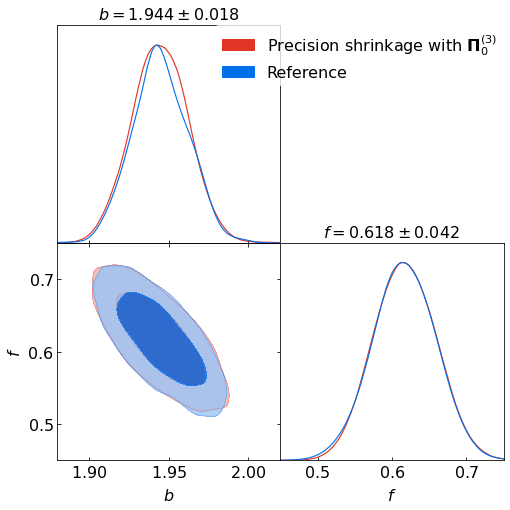

In [112]:
g = plots.getSubplotPlotter(subplot_size=4)
g.settings.figure_legend_frame = False
g.settings.legend_fontsize=16
g.settings.axes_fontsize=16
g.settings.axes_labelsize=16
g.triangle_plot(
    [samples, reference],
    filled=True,
    contour_args={'alpha':0.8}, title_limit=1,
    legend_labels=[label, "Reference"],
    #param_limits = {"b": (1.78, 2.12), "f": (0.2, 1.0)} # n=21 tick limits
    #param_limits = {"b": (1.85, 2.05), "f": (0.4, 0.85)} # n=30 tick limits
    param_limits = {"b": (1.88, 2.02), "f": (0.45, 0.75)} # n=2048 tick limits
)

#plt.savefig(f"../output/BOSS_DR12_NGC_z1/plots/samples/{mat_type}_{est_type}_{n}.pdf", format="pdf", bbox_inches='tight', pad_inches = 0.1)